In [1]:
#------------------------------------------------------------------------------#

# Numerik WiSe 2021/22 - Blatt 4
# Aufgabe 4.4
# Autor: Jakob Sachs
# Gruppe: NumerikNumerik
# Benoetigte Module: numpy, matplotlib

#------------------------------------------------------------------------------#

# Importiere Module #

import numpy as np
import matplotlib.pyplot as plt

# Lade StyleSheet #

plt.style.use('fivethirtyeight')


In [2]:
#------------------------------------------------------------------------------#
# Aufgabe 4.4.1 #
#------------------------------------------------------------------------------#

# Runge-Funktion #

def runge(x): return 1 / (1 + x ** 2)

# Funktion zum Auswerten von Polynomen in Newton-Basis # 

def eval_poly_newton(x_i, a, x:float):
  """  Funktion zum Auswerten von Polynomen in Newton-Basis

  param x_i:  Die Stellen an denen die Koeffizienten aufgestellt wurden [x_0, ..., x_n]

  param a: Die Koeffizienten [a_0, ..., a_n]

  param x: Der Wert an der das Polynom auswertet werden soll 
  """
  n = len(a) 
  res = a[n-1]
  for i in range(n-2,-1,-1):
    res = res*(x-x_i[i]) + a[i]
  return res

# Funktion zum berechnen der dividierten Differenzen #
def divided_dif(x_i,y_i):
  """  Funktion zum berechnen der dividierten Differenzen 

  param x_i: Die Stellen an der die Funktion ausgewertet wurde [x_0, ..., x_n]

  param y_i: Die Funktionswerte der Funktion [f(x_0), ..., f(x_n)] 
  """
  n = len(x_i)
  T = np.zeros((n,n+1))
  T[:,0] = x_i[:] # copy
  T[:,1] = y_i[:] # copy

  for i in range(2,n+1):
    for j in range(i-1,n):
      T[j,i] = (T[j,i-1] - T[j-1,i-1]) / (T[j,0] - T[j-i+1,0]) # Dreieck Form
  d = np.zeros(n)
  for i in range(0,n):
    d[i] = T[i,i+1]
  return d


In [3]:
# ------------------------------------------------------------------------------#
# Interpoliere Funktion fuer n = 5,15,15     #
# ------------------------------------------------------------------------------#
x_plt = np.linspace(-5, 5, 1000)

x_n5 = np.array([-5 + (10 / 5) * i for i in range(5 + 1)])
P_n5 = divided_dif(x_n5, runge(x_n5))
P_n5_y = [eval_poly_newton(x_n5, P_n5, i) for i in x_plt]


x_n10 = np.array([-5 + (10 / 10) * i for i in range(10 + 1)])
P_n10 = divided_dif(x_n10, runge(x_n10))
P_n10_y = [eval_poly_newton(x_n10, P_n10, i) for i in x_plt]

x_n15 = np.array([-5 + (10 / 15) * i for i in range(15 + 1)])
P_n15 = divided_dif(x_n15, runge(x_n15))
P_n15_y = [eval_poly_newton(x_n15, P_n15, i) for i in x_plt]



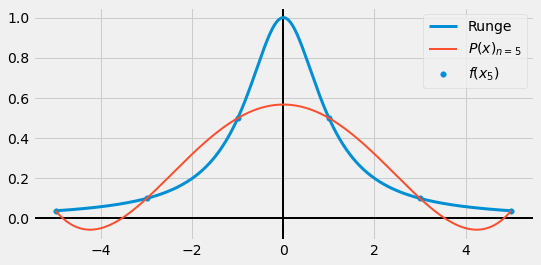

In [4]:


#------------------------------------------------------------------------------#
# Plot Funktion und Polynom mit n = 5
#------------------------------------------------------------------------------#

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, runge(x_plt), label='Runge',  linewidth=3)
plt.scatter(x_n5, runge(x_n5), label='$f(x_5)$', s=30)
plt.plot(x_plt, P_n5_y, label='$P(x)_{n=5}$', linewidth=2)
plt.legend()
plt.show()


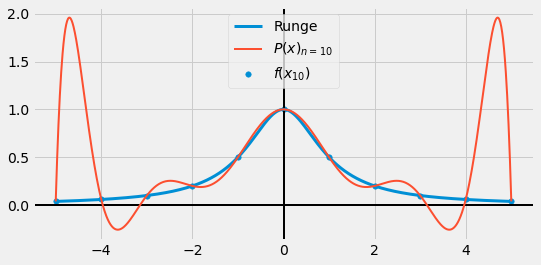

In [5]:
#------------------------------------------------------------------------------#
# Plot Funktion und Polynom mit n = 10
#------------------------------------------------------------------------------#

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, runge(x_plt), label='Runge',  linewidth=3)
plt.scatter(x_n10, runge(x_n10), label='$f(x_{10})$', s=30)
plt.plot(x_plt, P_n10_y, label='$P(x)_{n=10}$', linewidth=2)
plt.legend()
plt.show()


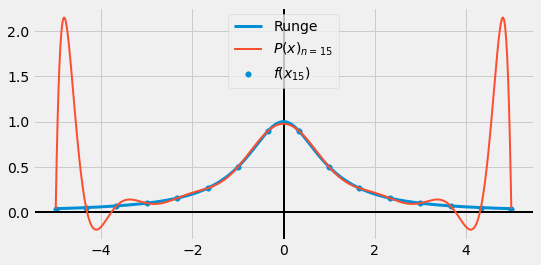

In [6]:
#------------------------------------------------------------------------------#
# Plot Funktion und Polynom mit n = 15
#------------------------------------------------------------------------------#

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, runge(x_plt), label='Runge',  linewidth=3)
plt.scatter(x_n15, runge(x_n15), label='$f(x_{15})$', s=30)
plt.plot(x_plt, P_n15_y, label='$P(x)_{n=15}$', linewidth=2)
plt.legend()
plt.show()


In [7]:
#------------------------------------------------------------------------------#
# Aufgabe 4.4.2
#------------------------------------------------------------------------------#

#------------------------------------------------------------------------------#
# Fehler fuer Polynome berechnen
#------------------------------------------------------------------------------#

err_n5 = np.abs(runge(x_plt) - P_n5_y)
err_n10 = np.abs(runge(x_plt) - P_n10_y)
err_n15 = np.abs(runge(x_plt) - P_n15_y)


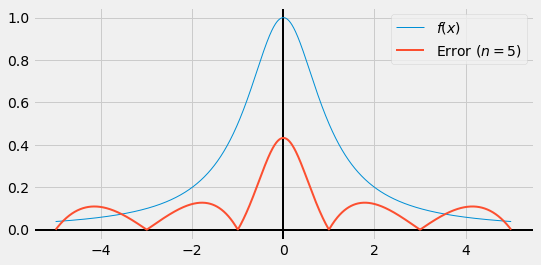

In [8]:
#------------------------------------------------------------------------------#
# Fehler plotten
#------------------------------------------------------------------------------#

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, runge(x_plt), label='$f(x)$',  linewidth=1)
plt.plot(x_plt, err_n5, label='Error ($n=5$)', linewidth=2)
plt.legend()
plt.show()


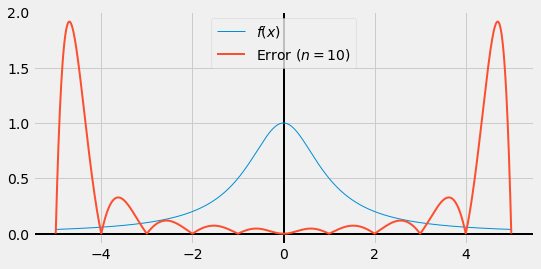

In [9]:
#------------------------------------------------------------------------------#
# Fehler plotten
#------------------------------------------------------------------------------#

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, runge(x_plt), label='$f(x)$',  linewidth=1)
plt.plot(x_plt, err_n10, label='Error ($n=10$)', linewidth=2)
plt.legend()
plt.show()


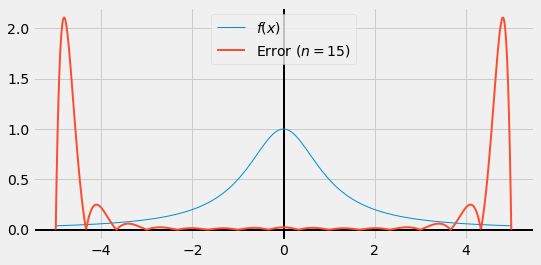

In [10]:
#------------------------------------------------------------------------------#
# Fehler plotten
#------------------------------------------------------------------------------#

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, runge(x_plt), label='$f(x)$',  linewidth=1)
plt.plot(x_plt, err_n15, label='Error ($n=15$)', linewidth=2)
plt.legend()
plt.show()


In [11]:
#------------------------------------------------------------------------------#
# Aufgabe 4.4.3
#------------------------------------------------------------------------------#


# Funktion zur Kubischen Spline-Interpolation

def cubic_spline(x_i,y_i,x):
  """ Funktion zur Kubischen Spline-Interpolation

  param x_i: Die Stellen an der die Funktion ausgewertet wurde [x_0, ..., x_n]

  param y_i: Die Funktionswerte der Funktion [f(x_0), ..., f(x_n)] 

  param x: Die Stellen an denen der Spline ausgewertet werden soll

  returns y: Die Funktionwerte vom Spline an den Stellen x
  """
  n = len(x_i)-1

  # wir fuellen den ersten eintrag dieser arrays mit np.NAN damit wir 
  # die arrays h_i,k_i und d_i genauso wie in der Vorlesung addressieren koennen
  h_i = np.zeros(n+1)
  h_i[0] = np.NAN
  for i in range(1,n+1): # 1 <= i <= n
    h_i[i] = x_i[i] - x_i[i-1]
  pass 

  k_i = np.zeros(n)
  k_i[0] = np.NAN 
  for i in range(1,n): # 1 <= i <= n-1
    k_i[i] = h_i[i+1] + h_i[i]
  
  d_i = np.zeros(n)
  d_i[0] = np.nan
  for i in range(1,n): # 1 <= i <= n-1
    d_i[i] = 6* ((( y_i[i+1] - y_i[i] ) / h_i[i+1])-
    ((y_i[i] - y_i[i-1]) / h_i[i]))
  
  # lineares system loesen mit dem Thomas-Algorithmus
  a_m = h_i[1:] 
  b_m = 2*k_i[1:]
  c_m = h_i[1:]
  d_m = d_i[1:]
  n_m = len(d_m)
  
  for i in range(1,n_m):
    m = a_m[i-1] / b_m[i-1]

    b_m[i] = b_m[i] - m*c_m[i-1]
    d_m[i] = d_m[i] - m*d_m[i-1]
  x_m= b_m
  x_m[-1] = d_m[-1] / b_m[-1]

  for i in range(n_m-2,-1,-1):
    x_m[i] = (d_m[i] - c_m[i]*x_m[i+1]) / b_m[i]

  M_i = x_m
  M_i = np.insert(M_i,0,0) # Grenzbedingungen fuer natuerliche Splines
  M_i = np.insert(M_i,n,0) 
  
  # koeffizienten berechnen
  c_0 = np.zeros(n+1) # in der VL a_j
  c_0[0] = np.NAN 
  c_1 = np.zeros(n+1) # in der VL b_j
  c_1[0] = np.NAN 
  c_2 = np.zeros(n+1) # in der VL c_j
  c_2[0] = np.NAN 
  c_3 = np.zeros(n+1) # in der VL d_j
  c_3[0] = np.NAN 
  for i in range(1,n+1): # 1 <= i <= n
    c_0[i] = y_i[i-1]
    
    c_1[i] = ((y_i[i] - y_i[i-1]) / h_i[i]) - ((2*M_i[i-1]+M_i[i])/6) * h_i[i]

    c_2[i] = M_i[i-1]/2

    c_3[i] = (M_i[i] - M_i[i-1])/(6*h_i[i])
  # evaluiere Spline an Stellen x
  y = np.zeros(len(x))
  for j in range(len(x)):
    X = x[j]

    for i in range(1,n+1): # 1 <= i <= n
      if X >= x_i[i-1] and X <= x_i[i]:
        y[j] += c_0[i] 
        y[j] += c_1[i] * (X - x_i[i-1]) 
        y[j] += c_2[i] * (X - x_i[i-1])**2 
        y[j] += c_3[i] * (X - x_i[i-1])**3
        break
  return y

  
spline_n5 = cubic_spline(x_n5, runge(x_n5),x_plt)
spline_n10 = cubic_spline(x_n10, runge(x_n10),x_plt)
spline_n15 = cubic_spline(x_n15, runge(x_n15),x_plt)

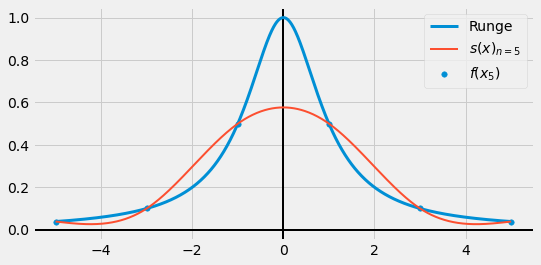

In [12]:
#------------------------------------------------------------------------------#
# Plot Funktion und Spline mit n = 5
#------------------------------------------------------------------------------#

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, runge(x_plt), label='Runge',  linewidth=3)
plt.scatter(x_n5, runge(x_n5), label='$f(x_{5})$', s=30)
plt.plot(x_plt, spline_n5, label='$s(x)_{n=5}$', linewidth=2)
plt.legend()
plt.show()


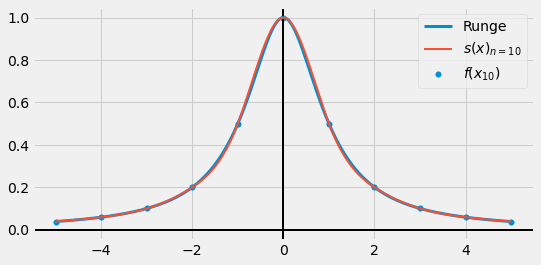

In [13]:
#------------------------------------------------------------------------------#
# Plot Funktion und Spline mit n = 10
#------------------------------------------------------------------------------#

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, runge(x_plt), label='Runge',  linewidth=3)
plt.scatter(x_n10, runge(x_n10), label='$f(x_{10})$', s=30)
plt.plot(x_plt, spline_n10, label='$s(x)_{n=10}$', linewidth=2)
plt.legend()
plt.show()


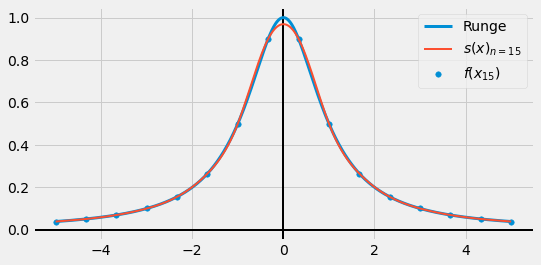

In [14]:
#------------------------------------------------------------------------------#
# Plot Funktion und Spline mit n = 15
#------------------------------------------------------------------------------#

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, runge(x_plt), label='Runge',  linewidth=3)
plt.scatter(x_n15, runge(x_n15), label='$f(x_{15})$', s=30)
plt.plot(x_plt, spline_n15, label='$s(x)_{n=15}$', linewidth=2)
plt.legend()
plt.show()


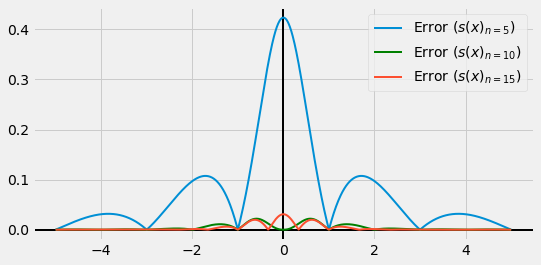

In [15]:
#------------------------------------------------------------------------------#
# Berechene und Plote den Fehler fuer alle Splines
#------------------------------------------------------------------------------#

err_s_n5 = np.abs(runge(x_plt) - spline_n5)
err_s_n10 = np.abs(runge(x_plt) - spline_n10)
err_s_n15 = np.abs(runge(x_plt) - spline_n15)


fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axhline(y=0, color='k', linewidth=2)
ax.axvline(x=0, color='k', linewidth=2)

plt.plot(x_plt, err_s_n5, label='Error ($s(x)_{n=5}$)', linewidth=2)
plt.plot(x_plt, err_s_n10, label='Error ($s(x)_{n=10}$)',color='green', linewidth=2)
plt.plot(x_plt, err_s_n15, label='Error ($s(x)_{n=15}$)', linewidth=2)
plt.legend()
plt.show()
